Name: Kieran Fitzmaurice

# Fourier Transforms of Simple Functions

(Adapted from textbook exercise 7.1)

Calculate the coefficients in the discrete Fourier transforms of the following periodic functions sampled at $N=100$ evenly spaced points, and make plots of their amplitudes:

- A single cycle of a square-wave with amplitude 1
- The sawtooth wave $y_n=n$
- The modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$

> Hint: The routine you choose to use for the Fourier transform will determine the order the coefficients are in. If need be, you should reorder them to range from $k=-50$ to $k=49$, with $k=0$ in the middle. 

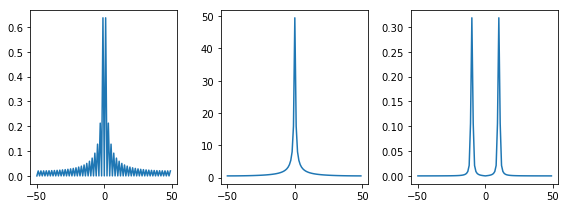

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

N = 100
n = np.arange(0,100,1)


square = np.concatenate((-1*np.ones(50),np.ones(50)),axis = 0)
sawtooth = np.arange(0,100,1)
mod_sin = np.sin(np.pi*sawtooth/N)*np.sin(20*np.pi*sawtooth/N)

c1 = []
c2 = []
c3 = []

kk = np.arange(-50,50,1)

for k in kk:
    c1.append(np.sum(square*np.exp(-1j*2*np.pi*k*n/N)))
    c2.append(np.sum(sawtooth*np.exp(-1j*2*np.pi*k*n/N)))
    c3.append(np.sum(mod_sin*np.exp(-1j*2*np.pi*k*n/N)))
    
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

yk1 = c1/N
yk2 = c2/N
yk3 = c3/N

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (8,3))

ax1.plot(kk,abs(yk1))
ax2.plot(kk,abs(yk2))
ax3.plot(kk,abs(yk3))
fig.tight_layout()

plt.show()


# Detecting Periodicity

(Adapted from textbook exercise 7.2)

On CourseWeb, there is a file called `sunspots.txt`, which contains the observed number of sunspots on the
Sun for each month since January 1749. The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

- Like you did in a previous assignment, read the data in the file and make a graph of sunspots as a function of time, with the $x$-axis in units of **years**. You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded. Make an estimate of the length of the cycle in years.

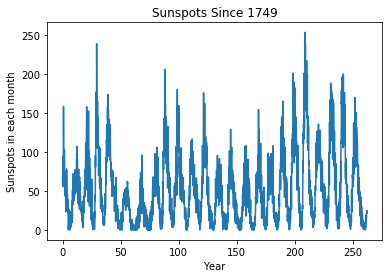

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

data = np.genfromtxt("sunspots.txt")
month = data[:,0]
sunspots = data[:,1]

year = month/12

plt.plot(year,sunspots)
plt.xlabel("Year")
plt.ylabel("Sunspots in each month")
plt.title("Sunspots Since 1749")
plt.show()

- Calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$ - also called the **power spectrum** of the sunspot signal. You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$ (you may need to adjust the limits of your graph). The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it - meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.


- Find the approximate value of $k$ to which the peak corresponds (you can do this by eye). What is the period of the sine wave with this value of $k$? Print this value in units of years. You should find that the period corresponds roughly to the length of the cycle that you estimated in the first part of this problem.

> This kind of Fourier analysis is a sensitive method for detecting periodicity in signals. Even in cases where it is not clear to the eye that there is a periodic component to a signal, it may still be possible to find one using a Fourier transform.

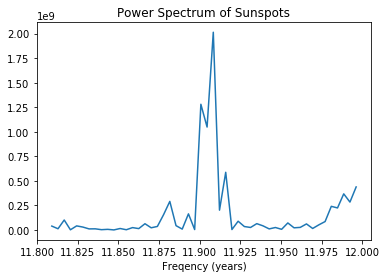

Period of Sunspots cycle is about 11.91 years


In [3]:
N = month.shape[0]
dt = 1/12
df = 1/(N*dt)
freq = np.arange(0, 1/dt, df)

ft_sunspots = fft.fft(sunspots)
c_sq = abs(ft_sunspots)**2

plt.plot(freq[-50:],c_sq[-50:])
plt.xlabel("Freqency (years)")
plt.title("Power Spectrum of Sunspots")
plt.show()
print("Period of Sunspots cycle is about 11.91 years")



# Fourier Filtering and Smoothing I

(Adapted from textbook exercise 7.4)

On CourseWeb, you'll find a file called `dow.txt`. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

- Read in the data from `dow.txt` and plot them on a graph.


- Calculate the coefficients of the discrete Fourier transform of the data. Now set all but the lowest 10% of the coefficients to zero (i.e., set the largest 90% to zero but keep the values of the lowest 10%). 
> Caution: Be careful to account for the way the coefficients are reported by the routine you choose to use. You want to keep coefficients where $|k|$ is small, and set the others to zero. Don't forget about the coefficients where $k<0$!


- Calculate the inverse Fourier transform of the resulting array, zeros and all, and plot it on the same graph as the original data. You may need to increase the size of the figure to be able to see it clearly.


- Repeat the previous step, but this time set all but the first 2% of the coefficients to zero.

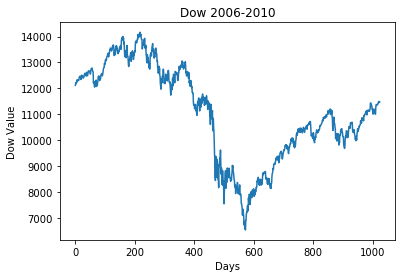

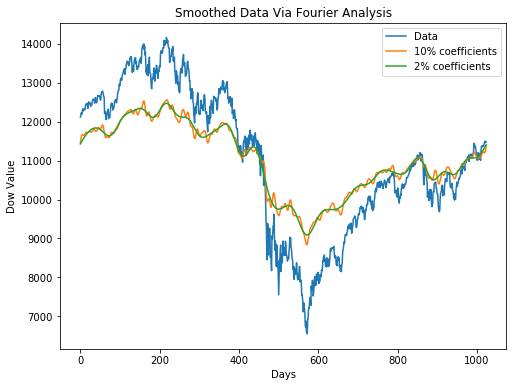

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

dow = np.genfromtxt("dow.txt")
N = dow.shape[0]
n = np.arange(N)

plt.plot(n,dow)
plt.xlabel("Days")
plt.ylabel("Dow Value")
plt.title("Dow 2006-2010")
plt.show()

c = []

#discrete fourier transform
for kk in range(N):
    c.append(np.sum(dow*np.exp(-1j*2*np.pi*kk*n/N)))
    
c = np.array(c, dtype = complex)

I10 = int(0.1*N)
I02 = int(0.02*N)

c10 = np.zeros(N,dtype = complex)
c02 = np.zeros(N,dtype = complex)
c10[0:I10] = c[0:I10]
c02[0:I02] = c[0:I02]

c10 = c10[(c10 > 0)]

k = np.arange(N)
y10 = []
y02 = []

#inverse discrete fourier transform
for nn in range(N):
    y10.append(1/N*np.sum(c10*np.exp(1j*2*np.pi*k*nn/N)))
    y02.append(1/N*np.sum(c02*np.exp(1j*2*np.pi*k*nn/N)))
    
y10 = np.array(y10)
y02 = np.array(y02)

fig = plt.figure(figsize = (8,6))
plt.plot(k,dow,label = "Data")
plt.plot(k,y10,label = "10% coefficients")
plt.plot(k,y02,label = "2% coefficients")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Dow Value")
plt.title("Smoothed Data Via Fourier Analysis")
plt.show()


Comment on what you see. What is happening when you set the Fourier coefficients to zero?  

The more coefficients of the higher terms that we discard, the more smooth the resulting inverse fourier transform will appear.

# Fourier Filtering and Smoothing II

(Adapted from textbook exercise 7.6)

The previous problem looked at data representing the variation of the Dow Jones Industrial Average, colloquially called "the Dow," over time. The particular time period studied in that exercise was special in one sense: the value of the Dow at the end of the period was almost the same as at the start, so the function was, roughly speaking, periodic. On CourseWeb, there is another file called `dow2.txt`, which also contains data on the Dow but for a different time period, from 2004 until 2008. Over this period the value changed considerably from a starting level around 9000 to a final level around 14000.

- Write a program similar to the one for the previous part, in which you read the data in the file `dow2.txt` and plot it on a graph. Then smooth the data by calculating its Fourier transform, setting all but the first 2% of the coefficients to zero, and inverting the transform again, plotting the result on the same graph as the original data. As before, you should see that the data are smoothed, but now there will be an additional artifact. At the beginning and end of the plot you should see large deviations away from the true smoothed function. These occur because the function is required to be periodic - its last value must be the same as its first - so it needs to deviate substantially from the correct value to make the two ends of the function meet. In some situations (including this one) this behavior is unsatisfactory. If we want to use the Fourier transform for smoothing, we would certainly prefer that it not introduce artifacts of this kind.

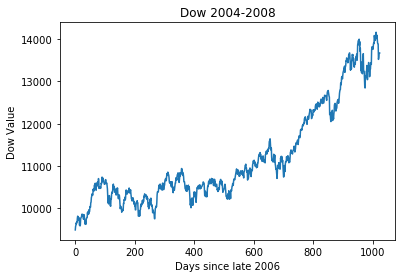

/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


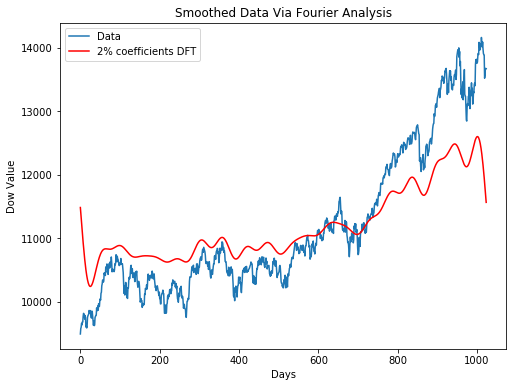

In [5]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

dow2 = np.genfromtxt("dow2.txt")

N = dow2.shape[0]
n = np.arange(N)

plt.plot(n,dow2)
plt.xlabel("Days since late 2006")
plt.ylabel("Dow Value")
plt.title("Dow 2004-2008")
plt.show()

c = []

#discrete fourier transform
for kk in range(N):
    c.append(np.sum(dow2*np.exp(-1j*2*np.pi*kk*n/N)))
    
c = np.array(c, dtype = complex)

I02 = int(0.02*N)

c02 = np.zeros(N,dtype = complex)
c02[0:I02] = c[0:I02]

k = np.arange(N)
y02 = []

#inverse discrete fourier transform
for nn in range(N):
    y02.append(1/N*np.sum(c02*np.exp(1j*2*np.pi*k*nn/N)))
    
y02 = np.array(y02)
    
fig = plt.figure(figsize = (8,6))
plt.plot(k,dow2,label = "Data")
plt.plot(k,y02,'r',label = "2% coefficients DFT")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Dow Value")
plt.title("Smoothed Data Via Fourier Analysis")
plt.show()





- Modify your program to repeat the same analysis using **discrete cosine transforms**. Again discard all but the first 2% of the coefficients, invert the transform, and plot the result. You should see a significant improvement, with less distortion of the function at the ends of the interval.  This occurs because the cosine transform does not force the value of the function to be the same at both ends.

> It is because of the artifacts introduced by the strict periodicity of the DFT that the cosine transform is favored for many technological applications, such as audio compression. The artifacts can degrade the sound quality of compressed audio and the cosine transform generally gives better results.

> The cosine transform is not wholly free of artifacts itself however. It's true it does not force the function to be periodic, but it does force the gradient to be zero at the ends of the interval (which the ordinary Fourier transform does not). You may be able to see this in your calculations above. Look closely at the smoothed function and you should see that its slope is flat at the beginning and end of the interval. The distortion of the function introduced is less than the distortion in the first part, but it's there all the same. To reduce this effect, audio
compression schemes often use overlapped cosine transforms, in which transforms are performed on overlapping blocks of samples, so that the portions at the ends of blocks, where the worst artifacts lie, need not be used.

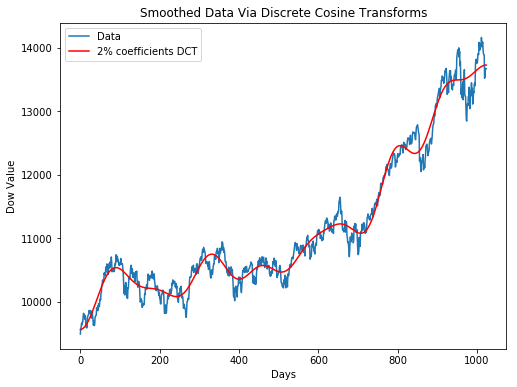

In [6]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

dow2 = np.genfromtxt("dow2.txt")

N = dow2.shape[0]
n = np.arange(N)

#discrete cosine transform
ct_dow2 = fft.dct(dow2, norm="ortho")
I02 = int(0.02*N)
c02 = np.zeros(N)
c02[0:I02] = ct_dow2[0:I02]

y02 = fft.idct(c02, norm="ortho")


fig = plt.figure(figsize = (8,6))
plt.plot(n,dow2,label = "Data")
plt.plot(n,y02,'r',label = "2% coefficients DCT")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Dow Value")
plt.title("Smoothed Data Via Discrete Cosine Transforms")
plt.show()